<a href="https://colab.research.google.com/github/vichacker1234/Curso_mineria_de_datos/blob/main/SOM_victimas_antipersona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis del conjunto de datos (modelo de tipo explicativo)**

In [ ]:
#Importar las librerías más importantes 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import sys
sys.path.insert(0, '../')




import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload

In [ ]:
#Montar el drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Lectura del dataframe de victimas 
victimas_minas_df=pd.read_csv('/content/gdrive/MyDrive/Mineria_de_datos/victimas_MAP_1999-2017.csv')

In [ ]:
# Ver las columnas del dataframe
victimas_minas_df.head()

In [ ]:
victimas_minas_df.shape

(12229, 17)

In [ ]:
#Tamaño del dataframe
print(victimas_minas_df.shape)
#Columnas del dataframe 
victimas_minas_df.columns

(12229, 17)


Index(['departamento', 'codigodanedepartamento', 'municipio',
       'codigodanemunicipio', 'tipoarea', 'sitio', 'ano', 'mes', 'rangoedad',
       'grupoetnico', 'condicion', 'estado', 'genero', 'latitudcabecera',
       'longitudcabecera', 'tipoevento', 'Ubicación'],
      dtype='object')

##**Resumen de los resultados estadísticos**

In [ ]:
#Resumen estadístico del dataframe
victimas_minas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12229 entries, 0 to 12228
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   departamento            12229 non-null  object 
 1   codigodanedepartamento  12229 non-null  int64  
 2   municipio               12229 non-null  object 
 3   codigodanemunicipio     12229 non-null  int64  
 4   tipoarea                12229 non-null  object 
 5   sitio                   12229 non-null  object 
 6   ano                     12229 non-null  int64  
 7   mes                     12229 non-null  int64  
 8   rangoedad               12229 non-null  object 
 9   grupoetnico             12229 non-null  object 
 10  condicion               12229 non-null  object 
 11  estado                  12229 non-null  object 
 12  genero                  12229 non-null  object 
 13  latitudcabecera         12229 non-null  float64
 14  longitudcabecera        12229 non-null

#**Reducción de dimensionalidad**

En este apartado se van a seleccionar las variables categórticas para codificarlas usando one-hot

##**Definir las variables categóricas**

In [ ]:
#Definir las variables categóricas
df1_cat=victimas_minas_df[['rangoedad','condicion','tipoarea','grupoetnico','genero']]

In [ ]:
#10 primeros registros de la parte superior
df1_cat.head(10)


##**Tabla cruzada**

In [ ]:
#Primera tabla cruzada
T1=pd.crosstab(victimas_minas_df.departamento,victimas_minas_df.estado,margins_name='Total')

In [ ]:
T1.head(10)

estado,Herido,Muerto
departamento,,
AMAZONAS,2,2
ANTIOQUIA,2226,418
ARAUCA,535,118
ATLANTICO,7,1
BOGOTA DC,19,11
BOLIVAR,546,91
BOYACA,63,15
CALDAS,134,34
CAQUETA,836,113


In [ ]:
type(T1)      





pandas.core.frame.DataFrame

In [ ]:
T2=pd.crosstab(victimas_minas_df.departamento,victimas_minas_df.condicion,margins_name='Total')

In [ ]:
T2.head(10)

condicion,Civil,Fuerza pública
departamento,,
AMAZONAS,1,3
ANTIOQUIA,1213,1431
ARAUCA,230,423
ATLANTICO,8,0
BOGOTA DC,11,19
BOLIVAR,228,409
BOYACA,26,52
CALDAS,45,123
CAQUETA,220,729


##**T3**

In [ ]:
T3=pd.crosstab(victimas_minas_df.departamento,victimas_minas_df.tipoarea,margins_name='Total')

In [ ]:
T3

tipoarea,Rural,Urbana
departamento,,
AMAZONAS,4,0
ANTIOQUIA,2581,63
ARAUCA,641,12
ATLANTICO,2,6
BOGOTA DC,20,10
BOLIVAR,632,5
BOYACA,77,1
CALDAS,164,4
CAQUETA,942,7


##**T4**

In [ ]:
T4=pd.crosstab(victimas_minas_df.departamento,victimas_minas_df.grupoetnico)

In [ ]:
T4.head()

grupoetnico,Afrodescendiente,Indigena,No
departamento,,,
AMAZONAS,0,0,4
ANTIOQUIA,7,40,2597
ARAUCA,4,12,637
ATLANTICO,0,0,8
BOGOTA DC,0,0,30


##**T5**

In [ ]:
T5=pd.crosstab(victimas_minas_df.departamento,victimas_minas_df.rangoedad)

In [ ]:
T5.head()

rangoedad,Mayor de 18 años,Menor de 18 años
departamento,,
AMAZONAS,4,0
ANTIOQUIA,2354,290
ARAUCA,599,54
ATLANTICO,1,7
BOGOTA DC,22,8


##**T6**

In [ ]:
T6=pd.crosstab(victimas_minas_df.departamento,victimas_minas_df.genero)

##**Unir los dataset**

In [ ]:
#Unir los dataframes
DF_1=pd.merge(T1,T2,how='inner',on='departamento')

In [ ]:
DF_1.head()

,Herido,Muerto,Civil,Fuerza pública
departamento,,,,
AMAZONAS,2,2,1,3
ANTIOQUIA,2226,418,1213,1431
ARAUCA,535,118,230,423
ATLANTICO,7,1,8,0
BOGOTA DC,19,11,11,19


In [ ]:
#Cruzar con T3
DF_2=pd.merge(T3,DF_1,how='inner',on='departamento')


In [ ]:
DF_2.head()

,Rural,Urbana,Herido,Muerto,Civil,Fuerza pública
departamento,,,,,,
AMAZONAS,4,0,2,2,1,3
ANTIOQUIA,2581,63,2226,418,1213,1431
ARAUCA,641,12,535,118,230,423
ATLANTICO,2,6,7,1,8,0
BOGOTA DC,20,10,19,11,11,19


In [ ]:
#Cruzar con T4
DF_3=pd.merge(T4,DF_2,how='inner',on='departamento')

In [ ]:
DF_3.head()

,Afrodescendiente,Indigena,No,Rural,Urbana,Herido,Muerto,Civil,Fuerza pública
departamento,,,,,,,,,
AMAZONAS,0,0,4,4,0,2,2,1,3
ANTIOQUIA,7,40,2597,2581,63,2226,418,1213,1431
ARAUCA,4,12,637,641,12,535,118,230,423
ATLANTICO,0,0,8,2,6,7,1,8,0
BOGOTA DC,0,0,30,20,10,19,11,11,19


In [ ]:
#cruzar con T5
DF_final=pd.merge(T5,DF_3,how='inner',on='departamento')

In [ ]:
DF_


,Mayor de 18 años,Menor de 18 años,Afrodescendiente,Indigena,No,Rural,Urbana,Herido,Muerto,Civil,Fuerza pública
departamento,,,,,,,,,,,
AMAZONAS,4,0,0,0,4,4,0,2,2,1,3
ANTIOQUIA,2354,290,7,40,2597,2581,63,2226,418,1213,1431
ARAUCA,599,54,4,12,637,641,12,535,118,230,423
ATLANTICO,1,7,0,0,8,2,6,7,1,8,0
BOGOTA DC,22,8,0,0,30,20,10,19,11,11,19


In [ ]:
DF_final.to_excel('Victmas_por_depts.xlsx')

In [ ]:
Data_frame_final.head()

,Mayor de 18 años
departamento,
AMAZONAS,4
ANTIOQUIA,2354
ARAUCA,599
ATLANTICO,1
BOGOTA DC,22


In [ ]:
Regiones_naturales=['AMAZONÍA','ANDINA','ORINOQUÍA','CARIBE','ANDINA','CARIBE','ANDINA','ANDINA','ORINOQUÍA','ORINOQUÍA','PACÍFICA','ANDINA','PACÍFICA','CARIBE','ANDINA','AMAZONÍA','AMAZONÍA','HUILA','CARIBE','CARIBE','ORINOQUÍA','PACÍFICA','ANDINA','AMAZONÍA','ANDINA','ANDINA','ANDINA','CARIBE','ANDINA','PACÍFICA','AMAZONÍA','ORINOQUÍA']

In [ ]:
RN=pd.DataFrame(Regiones_naturales,columns=['Regiones_naturales'])

In [ ]:
pd.DataFrame?

In [ ]:
RN.to_excel('RN.xlsx')

In [ ]:
D1=[[DF_final,RN]]

In [ ]:
D2=pd.DataFrame(D1)

In [ ]:
RN.Regiones_naturales

##**Dataframe final**

In [ ]:
Data_final_victimas_reg=pd.read_excel('/content/Data_frame_final_victimas_regiones.xlsx')

In [ ]:
Data_final_victimas_reg.head(32)

In [ ]:
Data_final_victimas_reg.columns

Index(['departamento', 'Mayor de 18 años', 'Menor de 18 años',
       'Afrodescendiente', 'Indigena', 'No', 'Rural', 'Urbana', 'Herido',
       'Muerto', 'Civil', 'Fuerza pública', 'Regiones_naturales'],
      dtype='object')

In [ ]:
df1_cat.shape[0]

12229

In [ ]:
# size=32
# som = MiniSom(size, size, df1_cat.shape[0],
              # neighborhood_function='gaussian', sigma=1.5,
              # random_seed=1)

##**Establecer la codificación one hot de las variables**

In [ ]:
#Codificación de las variables categóricas
# One hot encoding - to convert categorical data to continuous
#dummies
df1_dummies= pd.get_dummies(df1_cat)
df1_dummies.head(50)

In [ ]:
df1_dummies.describe()

In [ ]:
df1_dummies.shape[1]

12

In [ ]:
victimas_minas_df['longitudcabecera']

In [ ]:
cluster_df2

In [ ]:
import sklearn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
cluster_df2.shape


##**Implementación del algoritmo**

In [ ]:
from sklearn.preprocessing import minmax_scale, scale

In [ ]:
X=scale(cluster_df2)
X

#**SOM**

In [ ]:
#Instalar minisom
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=a010e557fd115714e9fdebd2b36a877c7edb2a883c83af0f320b7eeb1b2de08e
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [ ]:
#Importar MiniSom
from minisom import MiniSom

In [ ]:
var_names = ['Mayor de 18 años', 'Menor de 18 años',
       'Afrodescendiente', 'Indigena', 'No', 'Rural', 'Urbana', 'Herido',
       'Muerto', 'Civil', 'Fuerza pública']

In [ ]:
from sklearn.preprocessing import minmax_scale, scale

In [ ]:
X = Data_final_victimas_reg[var_names].values
X

array([[   4,    0,    0,    0,    4,    4,    0,    2,    2,    1,    3],
       [2354,  290,    7,   40, 2597, 2581,   63, 2226,  418, 1213, 1431],
       [ 599,   54,    4,   12,  637,  641,   12,  535,  118,  230,  423],
       [   1,    7,    0,    0,    8,    2,    6,    7,    1,    8,    0],
       [  22,    8,    0,    0,   30,   20,   10,   19,   11,   11,   19],
       [ 588,   49,    0,    0,  637,  632,    5,  546,   91,  228,  409],
       [  64,   14,    0,    0,   78,   77,    1,   63,   15,   26,   52],
       [ 146,   22,    0,    0,  168,  164,    4,  134,   34,   45,  123],
       [ 892,   57,    1,    3,  945,  942,    7,  836,  113,  220,  729],
       [  85,    5,    1,    0,   89,   90,    0,   61,   29,   17,   73],
       [ 516,  135,    5,   82,  564,  640,   11,  532,  119,  306,  345],
       [ 135,   23,    0,    7,  151,  146,   12,   99,   59,   79,   79],
       [ 175,   34,   38,   33,  138,  208,    1,  169,   40,  120,   89],
       [ 270,   13,    0,

In [ ]:
X = scale(X)
X

array([[-0.71612329, -0.70007503, -0.34522738, -0.45410147, -0.70406221,
        -0.71680425, -0.65281244, -0.69622103, -0.80834313, -0.63439586,
        -0.7455125 ],
       [ 4.25870087,  4.39137971,  0.39833929,  0.81500308,  4.35879127,
         4.27016494,  4.65392093,  4.34843978,  3.91331715,  4.41059268,
         3.97028752],
       [ 0.54345985,  0.24798896,  0.07966786, -0.07337011,  0.53187541,
         0.51590796,  0.35799392,  0.51277367,  0.50827368,  0.31882392,
         0.6414875 ],
       [-0.72247413, -0.57717784, -0.34522738, -0.45410147, -0.69625218,
        -0.72067462, -0.14740926, -0.68487962, -0.81969328, -0.60525814,
        -0.75541965],
       [-0.67801826, -0.5596211 , -0.34522738, -0.45410147, -0.653297  ,
        -0.68584131,  0.18952619, -0.65766023, -0.70619183, -0.59277054,
        -0.69267441],
       [ 0.52017344,  0.16020526, -0.34522738, -0.45410147,  0.53187541,
         0.49849131, -0.23164312,  0.53772478,  0.20181976,  0.31049886,
         0.595

In [ ]:
#Implmentación del algoritmo
#Definir el tamaño de la grilla
size = 3
#Definir la función som
som = MiniSom(size, size, len(X[0]),
              neighborhood_function='gaussian', sigma=1.5,
              random_seed=1596)

In [ ]:
#Entrenamiento del algoritmo para som
som.pca_weights_init(X)
som.train_random(X, 1000, verbose=False)


##**Mapa  1 de los departamentos con respecto  la característica grupo étnico**

In [ ]:
depto_codes = {'ANTIOQUIA': 'AN','CAUCA':'CA','NARIÑO':'NA','BOLIVAR':'BO','NORTE DE SANTANDER':'NS','CORDOBA':'COR','CASANARE':'CAS','AMAZONAS':'AM','ARAUCA':'AR','ATLANTICO':'ATL','BOYACA':'BOY','CALDAS':'CAL',
               'CAQUETA':'CQ','CAUCA':'CA','CHOCO':'CH','CUNDINAMARCA':'CUND','GUAINIA':'GUA','LA GUAJIRA':'LG','HUILA':'HUI','MAGDALENA':'MG','META':'MT','NARIÑO':'NÑ','NORTE DE SANTANDER':'NS','PUTUMAYO':'PT','BOGOTA DC':'BDC','QUINDIO':'QD','RISARALDA':'RS','SANTANDER':'ST','SUCRE':'SC','TOLIMA':'TL','VALLE DEL CAUCA':'VC','VAUPES':'VP','VICHADA':'VI','CAQUETA':'CQ','GUAVIARE':'GV','CESAR':'CS'}

In [ ]:
#Tamaño de la lista de elemntos claves
len(depto_codes.keys())


32

In [ ]:
category_color_ge = {'AMAZONÍA': 'green',
                  'ANDINA': 'blue','CARIBE':'red','PACÍFICA':'purple','ORINOQUÍA':'black'}

In [ ]:
depto_codes = {'ANTIOQUIA': 'AN','CAUCA':'CA','NARIÑO':'NA','BOLIVAR':'BO','NORTE DE SANTANDER':'NS','CORDOBA':'COR','CASANARE':'CAS','AMAZONAS':'AM','ARAUCA':'AR','ATLANTICO':'ATL','BOYACA':'BOY','CALDAS':'CAL',
               'CAQUETA':'CQ','CAUCA':'CA','CHOCO':'CH','CUNDINAMARCA':'CUND','GUAINIA':'GUA','LA GUAJIRA':'LG','HUILA':'HUI','MAGDALENA':'MG','META':'MT','NARIÑO':'NÑ','NORTE DE SANTANDER':'NS','PUTUMAYO':'PT','BOGOTA DC':'BDC','QUINDIO':'QD','RISARALDA':'RS','SANTANDER':'ST','SUCRE':'SC','TOLIMA':'TL','VALLE DEL CAUCA':'VC','VAUPES':'VP','VICHADA':'VI','CAQUETA':'CQ','GUAVIARE':'GV','CESAR':'CS'}

In [ ]:
dept_colors_dict = {c: category_color_ge[dm] for c, dm in zip(Data_final_victimas_reg.departamento,Data_final_victimas_reg.Regiones_naturales)}

In [ ]:
dept_colors_dict.items()

dict_items([('AMAZONAS', 'green'), ('ANTIOQUIA', 'blue'), ('ARAUCA', 'black'), ('ATLANTICO', 'red'), ('BOGOTA DC', 'blue'), ('BOLIVAR', 'red'), ('BOYACA', 'blue'), ('CALDAS', 'blue'), ('CAQUETA', 'black'), ('CASANARE', 'black'), ('CAUCA', 'purple'), ('CESAR', 'blue'), ('CHOCO', 'purple'), ('CORDOBA', 'red'), ('CUNDINAMARCA', 'blue'), ('GUAINIA', 'green'), ('GUAVIARE', 'green'), ('HUILA', 'blue'), ('LA GUAJIRA', 'red'), ('MAGDALENA', 'red'), ('META', 'black'), ('NARIÑO', 'purple'), ('NORTE DE SANTANDER', 'blue'), ('PUTUMAYO', 'green'), ('QUINDIO', 'blue'), ('RISARALDA', 'blue'), ('SANTANDER', 'blue'), ('SUCRE', 'red'), ('TOLIMA', 'blue'), ('VALLE DEL CAUCA', 'purple'), ('VAUPES', 'green'), ('VICHADA', 'black')])

In [ ]:
v=[victimas_minas_df.departamento[1]]

In [ ]:
v

['CAQUETA']

In [ ]:
def shorten_dept(c):
    if len(c) > 3:
        return depto_codes[c]
    else:
        return c



In [ ]:

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]

plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))

In [ ]:
X.shape

(12229, 5)

In [ ]:
dept_map.items()

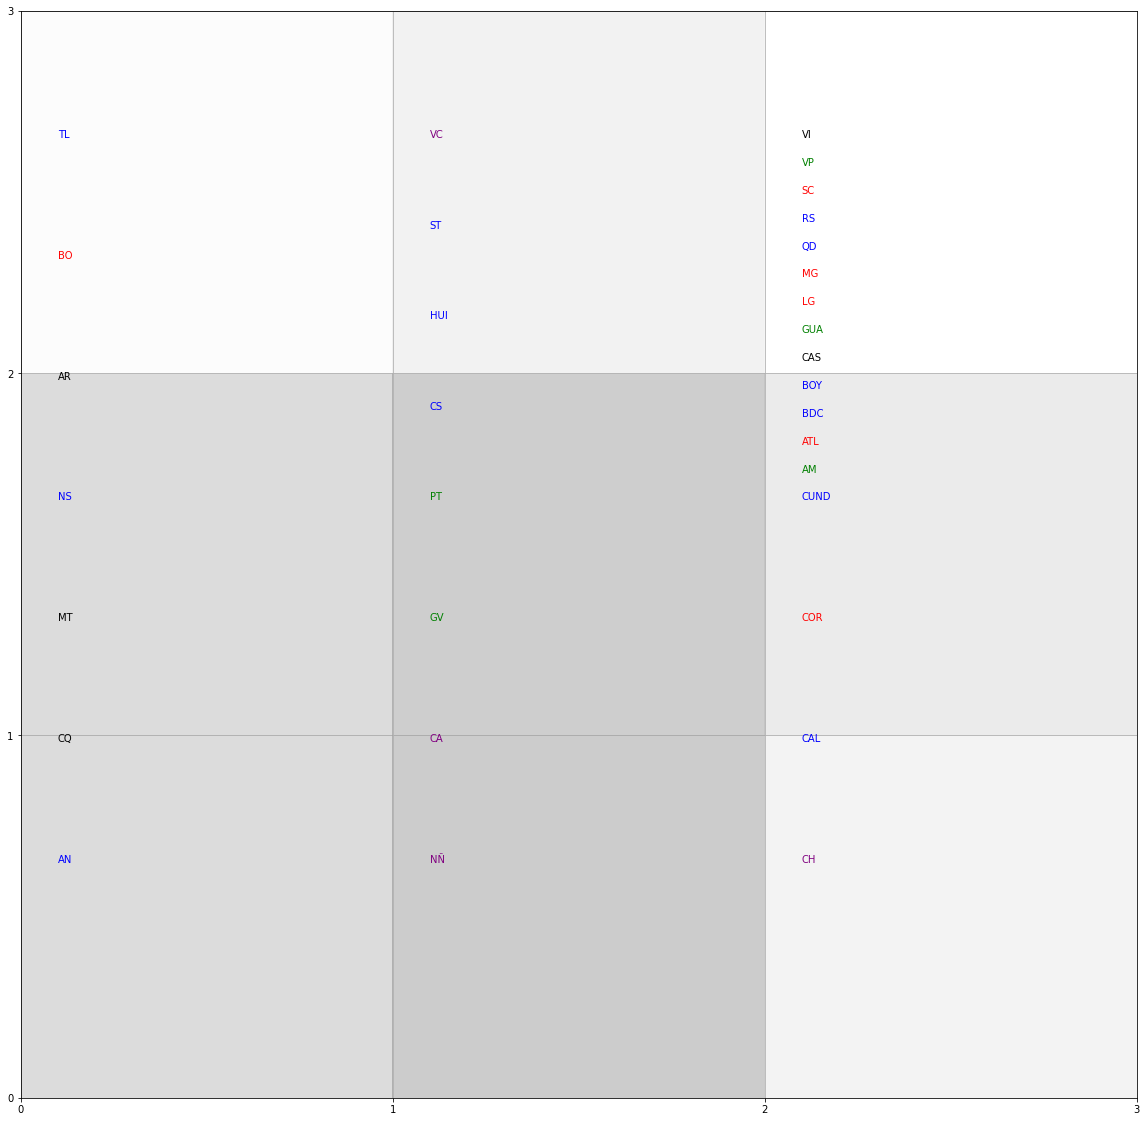

In [ ]:
dept_map = som.labels_map(X,Data_final_victimas_reg.departamento)
    
plt.figure(figsize=(20, 20))
for p, d in dept_map.items():
    depts = list(d)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(depts):
        off_set = (i+1)/len(depts) - 0.05
        plt.text(x, y+off_set,shorten_dept(c), color=dept_colors_dict[c], fontsize=10)
plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
plt.xticks(np.arange(size+1))
plt.yticks(np.arange(size+1))
plt.grid()


plt.show()

In [ ]:
depto_codes

{'ANTIOQUIA': 'AN',
 'CAUCA': 'CA',
 'NARIÑO': 'NÑ',
 'BOLIVAR': 'BO',
 'NORTE DE SANTANDER': 'NS',
 'CORDOBA': 'COR',
 'CASANARE': 'CAS',
 'AMAZONAS': 'AM',
 'ARAUCA': 'AR',
 'ATLANTICO': 'ATL',
 'BOYACA': 'BOY',
 'CALDAS': 'CAL',
 'CAQUETA': 'CQ',
 'CHOCO': 'CH',
 'CUNDINAMARCA': 'CUND',
 'GUAINIA': 'GUA',
 'LA GUAJIRA': 'LG',
 'HUILA': 'HUI',
 'MAGDALENA': 'MG',
 'META': 'MT',
 'PUTUMAYO': 'PT',
 'BOGOTA DC': 'BDC',
 'QUINDIO': 'QD',
 'RISARALDA': 'RS',
 'SANTANDER': 'ST',
 'SUCRE': 'SC',
 'TOLIMA': 'TL',
 'VALLE DEL CAUCA': 'VC',
 'VAUPES': 'VP',
 'VICHADA': 'VI',
 'GUAVIARE': 'GV',
 'CESAR': 'CS'}

##**Mapa 2 de los departametnos con respecto a la condicion**

In [ ]:
victimas_minas_df['condicion'].astype('category')

0        Civil
1        Civil
2        Civil
3        Civil
4        Civil
         ...  
12224    Civil
12225    Civil
12226    Civil
12227    Civil
12228    Civil
Name: condicion, Length: 12229, dtype: category
Categories (2, object): ['Civil', 'Fuerza pública']

In [ ]:
category_color_ge= {'Civil': 'purple',
                  'Fuerza pública': 'darkgreen'}

In [ ]:
dept_colors_dict_cond= {c: category_color_ge[dm] for c, dm in zip(victimas_minas_df.departamento,victimas_minas_df.condicion)}

In [ ]:
dept_colors_dict_cond.items()

In [ ]:
X

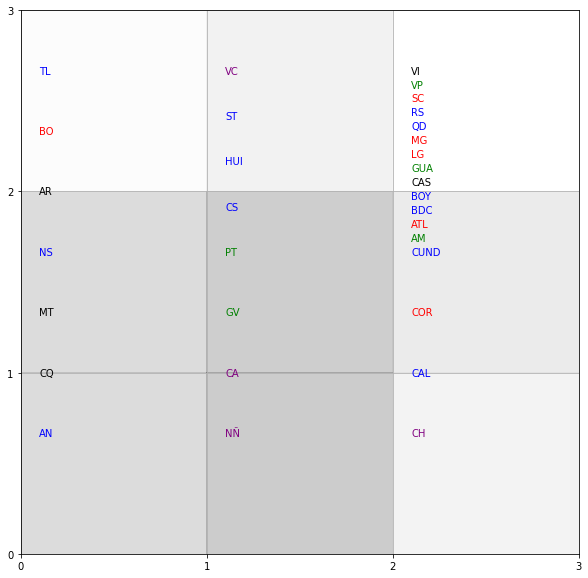

In [ ]:
dept_map = som.labels_map(X,Data_final_victimas_reg.departamento)
    
plt.figure(figsize=(10, 10))
for p, d in dept_map.items():
    depts = list(d)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(depts):
        off_set = (i+1)/len(depts) - 0.05
        plt.text(x, y+off_set,shorten_dept(c), color=dept_colors_dict[c], fontsize=10)
plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
plt.xticks(np.arange(size+1))
plt.yticks(np.arange(size+1))
plt.grid()


plt.show()



In [ ]:
plt.savefig('SOM1.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
depto_codes

{'ANTIOQUIA': 'AN',
 'CAUCA': 'CA',
 'NARIÑO': 'NÑ',
 'BOLIVAR': 'BO',
 'NORTE DE SANTANDER': 'NS',
 'CORDOBA': 'COR',
 'CASANARE': 'CAS',
 'AMAZONAS': 'AM',
 'ARAUCA': 'AR',
 'ATLANTICO': 'ATL',
 'BOYACA': 'BOY',
 'CALDAS': 'CAL',
 'CAQUETA': 'CQ',
 'CHOCO': 'CH',
 'CUNDINAMARCA': 'CUND',
 'GUAINIA': 'GUA',
 'HUILA': 'HUI',
 'LA GUAJIRA': 'LG',
 'MAGDALENA': 'MG',
 'META': 'MT',
 'PUTUMAYO': 'PT',
 'BOGOTA DC': 'BDC',
 'QUINDIO': 'QD',
 'RISARALDA': 'RS',
 'SANTANDER': 'ST',
 'SUCRE': 'SC',
 'TOLIMA': 'TL',
 'VALLE DEL CAUCA': 'VC',
 'VAUPES': 'VP',
 'VICHADA': 'VI',
 'GUAVIARE': 'GV',
 'CESAR': 'CS'}

##**Planos de características**

In [ ]:
var_quali_names = ['rangoedad', 'condicion', 'tipoarea', 'grupoetnico', 'genero']

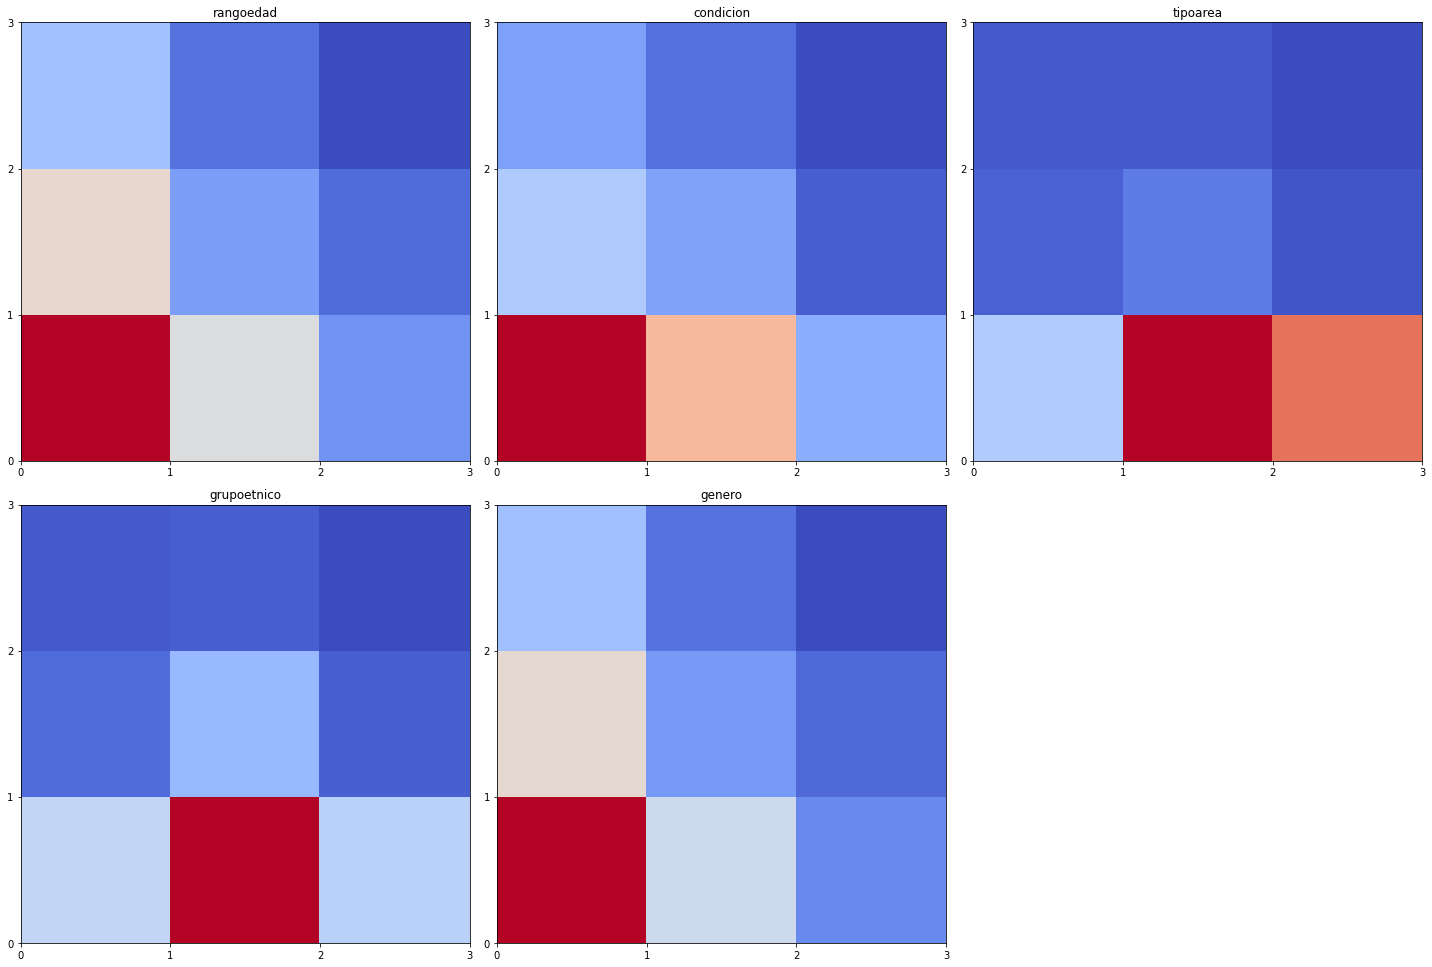

In [ ]:
#Planos de características
W = som.get_weights()
plt.figure(figsize=(20, 20))
for i, f in enumerate(var_quali_names):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.show()


In [ ]:
plt.savefig('heatmap.jpg')

<Figure size 432x288 with 0 Axes>

##**Plano de carcaterísticas más importantes**

In [ ]:
X.shape

(12229, 5)

In [ ]:
som.get_weights()

In [ ]:
W.shape

(20, 20, 5)

In [ ]:
som.get_weights().shape[0]

20

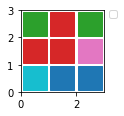

In [ ]:
Z = np.zeros((size, size))
plt.figure(figsize=(1.5, 1.5))
for i in np.arange(som.get_weights().shape[0]):
    for j in np.arange(som.get_weights().shape[1]):
        feature = np.argmax(W[i, j , :])
        plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),
                 marker='s', markersize=24)



plt.legend(loc='center left',
           bbox_to_anchor=(1, .95))
        
plt.xlim([0, size])
plt.ylim([0, size])
plt.show()